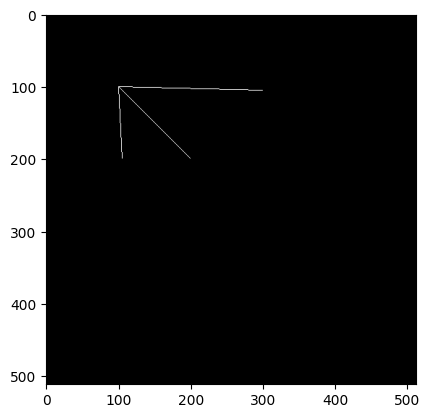

In [9]:
# import package for image processing
import matplotlib.pyplot  as plt
# import package for array operations
import numpy as np

# create a black image
img = np.zeros((512,512,3), np.uint8)



# line drawing algorithm
def draw_line(img, point1, point2):
    # calculate the difference between two points
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]

    # calculate the steps
    steps = abs(dx) if abs(dx) > abs(dy) else abs(dy)

    # calculate the increment in x and y direction
    x_increment = dx / float(steps)
    y_increment = dy / float(steps)

    # draw the line
    for i in range(steps):
        img[int(round(point1[1])), int(round(point1[0]))] = (255, 255, 255)
        point1 = (point1[0] + x_increment, point1[1] + y_increment)

# draw the line
point1 = (100, 100)
point2 = (200, 200)
draw_line(img, point1, point2)

# if the slope is steep
point2 = (105, 200)
draw_line(img, point1, point2)

# or
point2 = (300, 105)
draw_line(img, point1, point2)

# you have jagged lines

# how do we fix this?



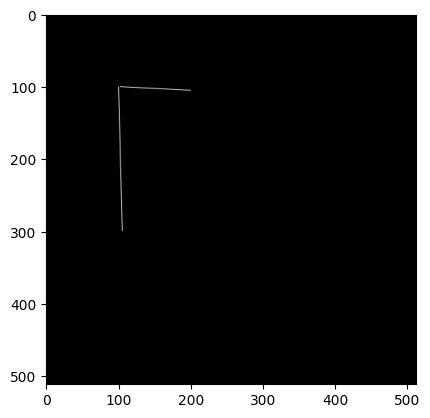

In [13]:
# reference : https://en.wikipedia.org/wiki/Xiaolin_Wu%27s_line_algorithm

def draw_point(img, point, gradiant):
    img[int(round(point[0])), int(round(point[1]))] = (255 * gradiant, 255 * gradiant, 255 * gradiant) 

# we can use anti-aliasing
def draw_line_wu(img, point1, point2):

    def ipart(x):
        return int(x)
    
    def fpart(x):
        return x - int(x)

    def round(x):
        return ipart(x + 0.5)
    
    def rfpart(x):
        return 1 - fpart(x)
    
    # calculate the difference between two points
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]

    steep = abs(dy) > abs(dx) 
    if steep:
        point1 = (point1[1], point1[0])
        point2 = (point2[1], point2[0])
        dx, dy = dy, dx
    
    if point1[0] > point2[0]:
        point1, point2 = point2, point1
    
    if dx == 0:
        gradient = 1
    else:
        gradient = dy / float(dx)

    xend = round(point1[0])
    yend = point1[1] + gradient * (xend - point1[0])

    xgap = rfpart(point1[0] + 0.5)
    xpxl1 = xend
    ypxl1 = ipart(yend)

    if steep:
        draw_point(img, (ypxl1, xpxl1), rfpart(yend) * xgap)
        draw_point(img, (ypxl1 + 1, xpxl1), fpart(yend) * xgap)
        # img[ypxl1, xpxl1] = (255, 255, 255) * rfpart(yend) * xgap
        # img[ypxl1 + 1, xpxl1] = (255, 255, 255) * fpart(yend) * xgap

    else:
        # img[xpxl1, ypxl1] = (255, 255, 255) * rfpart(yend) * xgap
        # img[xpxl1, ypxl1 + 1] = (255, 255, 255) * fpart(yend) * xgap
        draw_point(img, (xpxl1, ypxl1), rfpart(yend) * xgap)
        draw_point(img, (xpxl1, ypxl1 + 1), fpart(yend) * xgap)
    
    intery = yend + gradient

    xend = round(point2[0])
    yend = point2[1] + gradient * (xend - point2[0])

    xgap = fpart(point2[0] + 0.5)
    xpxl2 = xend
    ypxl2 = ipart(yend)

    if steep:
        draw_point(img, (ypxl2, xpxl2), rfpart(yend) * xgap)
        draw_point(img, (ypxl2 + 1, xpxl2), fpart(yend) * xgap)
    else:
        draw_point(img, (xpxl2, ypxl2), rfpart(yend) * xgap)
        draw_point(img, (xpxl2, ypxl2 + 1), fpart(yend) * xgap)

    if steep:
        for x in range(xpxl1 + 1, xpxl2):
            draw_point(img, (ipart(intery), x), rfpart(intery))
            draw_point(img, (ipart(intery) + 1, x), fpart(intery))
            intery = intery + gradient
    else:
        for x in range(xpxl1 + 1, xpxl2):
            draw_point(img, (x, ipart(intery)), rfpart(intery))
            draw_point(img, (x, ipart(intery) + 1), fpart(intery))
           
            intery = intery + gradient

img = np.zeros((512,512,3), np.uint8)

point1 = (100, 100)
point2 = (105, 200)
draw_line_wu(img, point1, point2)

# or 
point2 = (300, 105)
draw_line_wu(img, point1, point2)

plt.imshow(img)

plt.show()

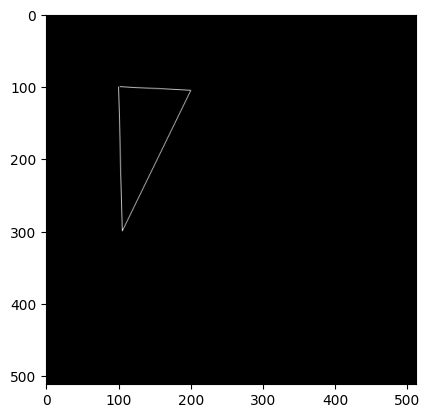

In [15]:
# now we will be able to draw a triangle

# draw a triangle
point1 = (100, 100)
point2 = (105, 200)
point3 = (300, 105)

draw_line_wu(img, point1, point2)
draw_line_wu(img, point2, point3)
draw_line_wu(img, point3, point1)

plt.imshow(img)

plt.show()

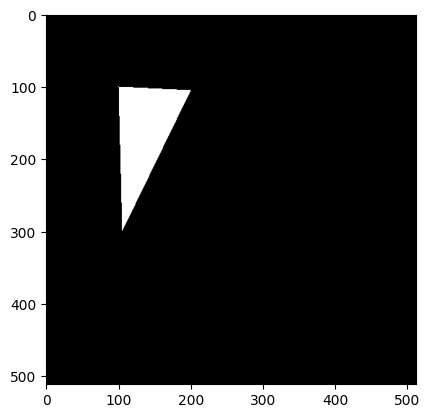

In [18]:
# We need to fill the triangle
# given a triangle with three points
# check if is inside
# if it is inside, fill it

def is_inside(triangle: list, point: tuple) -> bool:
    v0 = triangle[2] - triangle[0]
    v1 = triangle[1] - triangle[0]
    v2 = point - triangle[0]

    dot00 = np.dot(v0, v0)
    dot01 = np.dot(v0, v1)
    dot02 = np.dot(v0, v2)
    dot11 = np.dot(v1, v1)
    dot12 = np.dot(v1, v2)

    invDenom = 1 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * invDenom
    v = (dot00 * dot12 - dot01 * dot02) * invDenom

    return (u >= 0) and (v >= 0) and (u + v < 1)

def draw_triangle(img, triangle, color):
    # find the bounding box
    x_min = min(triangle[0][0], triangle[1][0], triangle[2][0])
    x_max = max(triangle[0][0], triangle[1][0], triangle[2][0])
    y_min = min(triangle[0][1], triangle[1][1], triangle[2][1])
    y_max = max(triangle[0][1], triangle[1][1], triangle[2][1])

    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            if is_inside(triangle, (x, y)):
                img[x, y] = color

img = np.zeros((512,512,3), np.uint8)

point1 = np.array([100, 100])
point2 = np.array([105, 200])
point3 = np.array([300, 105])

draw_triangle(img, [point1, point2, point3], (255, 255, 255))

plt.imshow(img)

plt.show()
